**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web

**READING DATA FROM YAHOO FINANCE SOURCE**

In [2]:
data=web.DataReader('INTC',data_source='yahoo',start='2012-01-01',end='2021-05-15')
data


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,18.532988
2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,18.963461
2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.182468
2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.069187
2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.235336
...,...,...,...,...,...,...
2021-05-10,57.230000,55.880001,57.150002,55.970001,35046500.0,55.970001
2021-05-11,55.630001,54.299999,55.049999,55.040001,35968100.0,55.040001
2021-05-12,54.650002,53.419998,54.389999,53.619999,30232300.0,53.619999


**STATISTICAL DESCRIPTION OF DATA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-01-03 to 2021-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2357 non-null   float64
 1   Low        2357 non-null   float64
 2   Open       2357 non-null   float64
 3   Close      2357 non-null   float64
 4   Volume     2357 non-null   float64
 5   Adj Close  2357 non-null   float64
dtypes: float64(6)
memory usage: 128.9 KB


In [4]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2357.000000,2357.000000,2357.000000,2357.000000,2.357000e+03,2357.000000
mean,38.728451,37.924228,38.313413,38.336367,3.048144e+07,34.566732
std,12.437864,12.049606,12.239936,12.242774,1.560575e+07,13.465392
min,19.549999,19.230000,19.520000,19.360001,5.893800e+06,15.128983
25%,27.980000,27.590000,27.730000,27.780001,2.071290e+07,21.898905
50%,35.330002,34.880001,35.130001,35.099998,2.692660e+07,31.000992
75%,49.240002,48.009998,48.580002,48.720001,3.537150e+07,45.953732
max,69.290001,67.309998,68.199997,68.470001,1.822699e+08,67.842155


In [5]:
data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
data.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999048,0.999322,0.999321,-0.221588,0.997128
Low,0.999048,1.000000,0.999434,0.999382,-0.242221,0.996867
Open,0.999322,0.999434,1.000000,0.998729,-0.231400,0.996404
Close,0.999321,0.999382,0.998729,1.000000,-0.233291,0.997477
Volume,-0.221588,-0.242221,-0.231400,-0.233291,1.000000,-0.229623
Adj Close,0.997128,0.996867,0.996404,0.997477,-0.229623,1.000000


Overall, the adjusted closing price will give you a better idea of the overall value of the stock and help you make informed decisions about buying and selling, while the closing stock price will tell you the exact cash value of a share of stock at the end of the trading day.

In [7]:
df = pd.DataFrame(data, columns=['Adj Close'])
df = df.reset_index()

In [8]:
df.head()

,Date,Adj Close
0,2012-01-03,18.532988
1,2012-01-04,18.963461
2,2012-01-05,19.182468
3,2012-01-06,19.069187
4,2012-01-09,19.235336


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2357 non-null   datetime64[ns]
 1   Adj Close  2357 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.0 KB


In [10]:
df.isna().values.any()

False

**VISUALIZATION OF DATA**

1. Box Plot

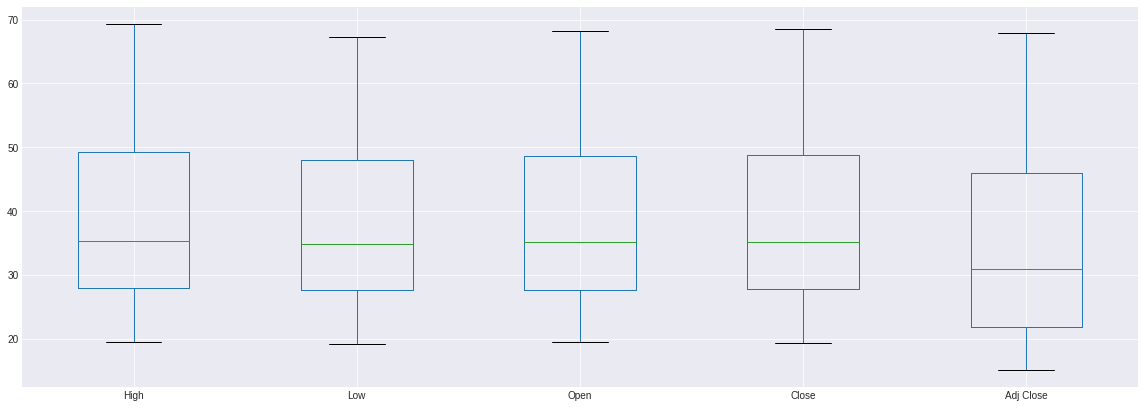

In [11]:
import seaborn as sns
plt.figure(figsize=(20,7))
boxplot = data.boxplot(column=['High', 'Low', 'Open','Close','Adj Close'])

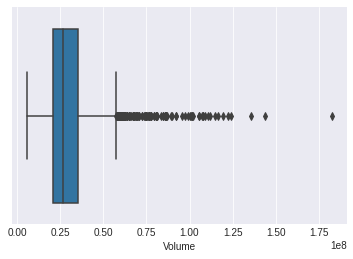

In [12]:
d = pd.DataFrame(data)
import seaborn as sns
sns.boxplot(x=d['Volume'])

This shows that the volume column contains lot of outlier values which might affect the results of prediction. Hence we remove the volume column itself as part of outlier elimination.

2. Visualization of Adjusted Close Price vs Data

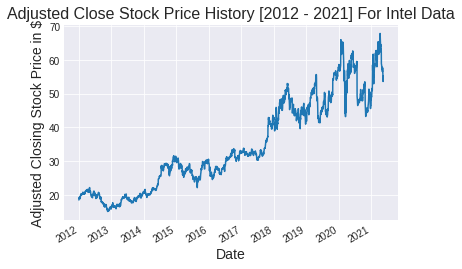

In [13]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Adj Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Adjusted Close Stock Price History [2012 - 2021] For Intel Data', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Adjusted Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

3. CORRELATION BETWEEN VARIABLES

Text(0.5, 1.0, 'Correlation between features')

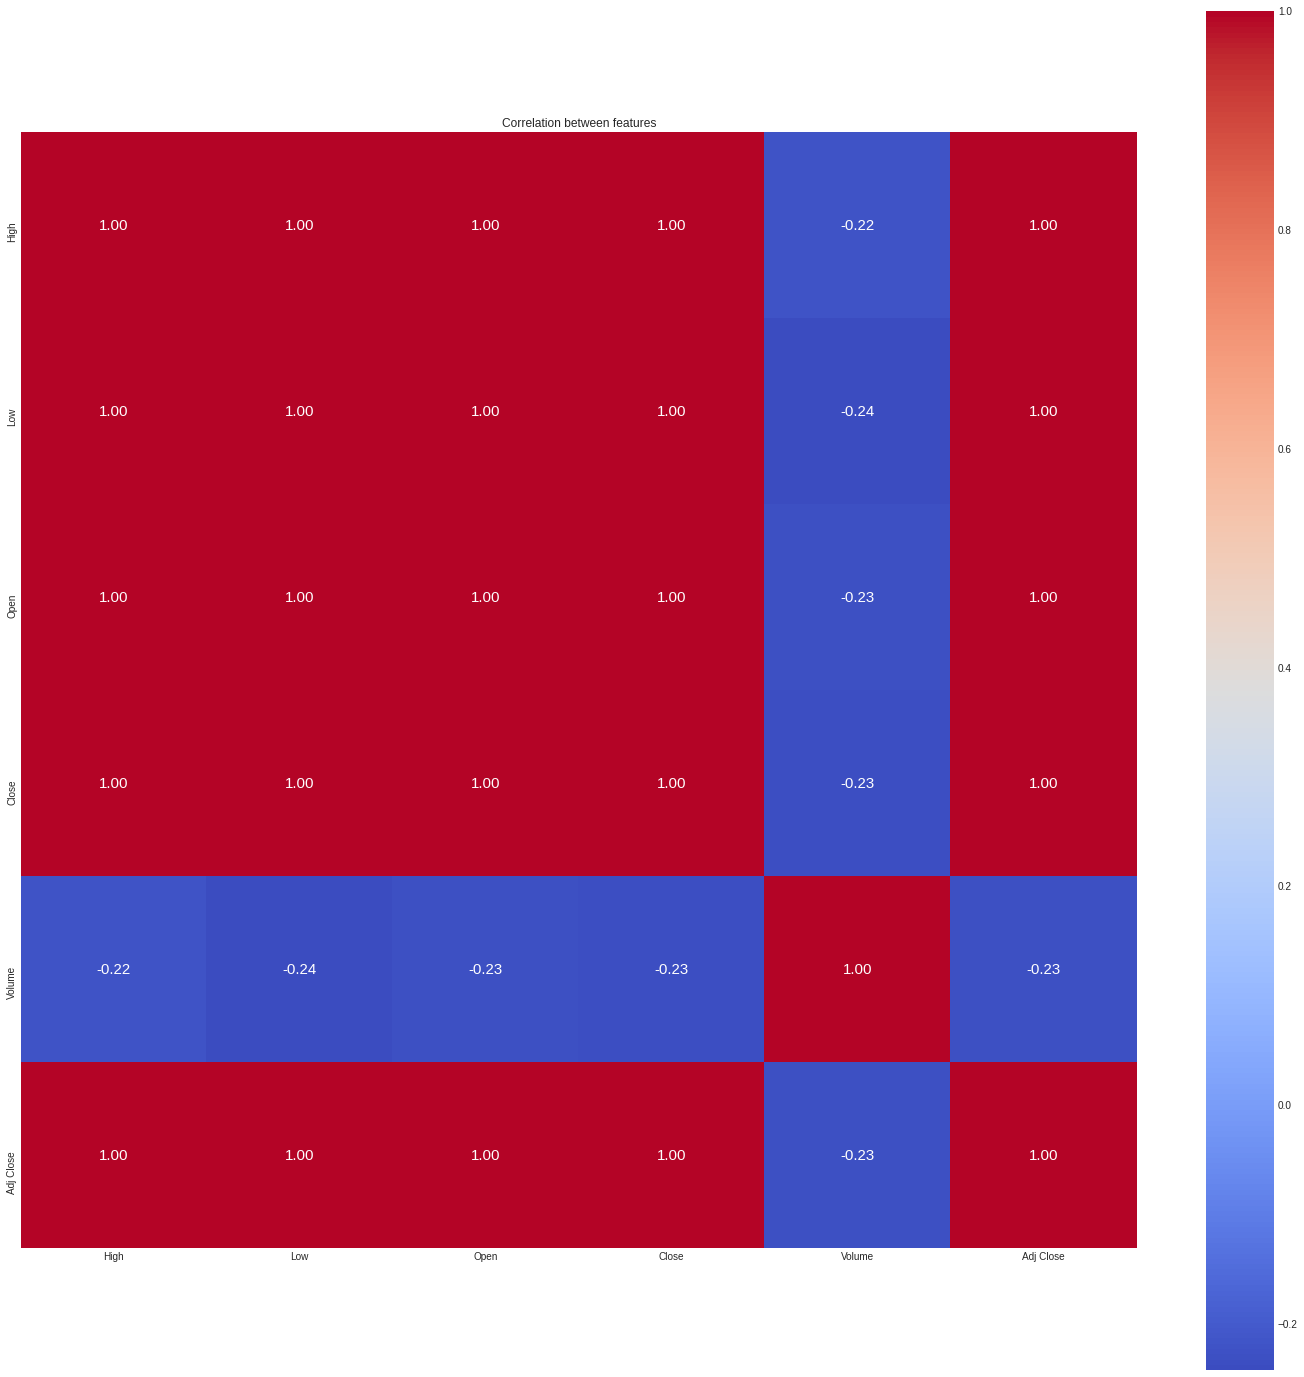

In [14]:
correlation=data.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

**PREDICTING THE ACCURACY OF PREDICTION OF STOCK PRICES USING ML AND DEEP LEARNING**

1. PREDICTION USING LINEAR REGRESSION

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.01866351244414111
Intercept:  12.668808899812621


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


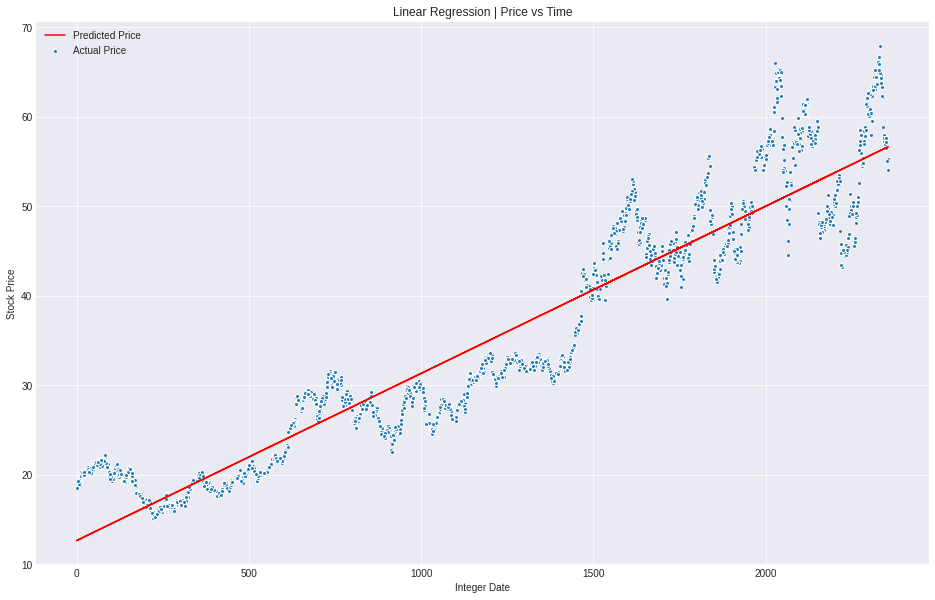

In [17]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
413      17.929497        20.376840
2134     56.012646        52.496744
2167     47.625160        53.112640
2284     56.003040        55.296271
1390     30.992947        38.611091
...            ...              ...
1515     38.988106        40.944030
2088     58.216534        51.638223
84       21.898905        14.236544
1184     33.353439        34.766408
1361     32.694656        38.069849

[472 rows x 2 columns]


1.1 Calculating the accuracy of the prediction

In [19]:
from sklearn import metrics
import math
rmse_linear=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_linear=model.score(X_test,y_test)

print("Root mean square error= ",rmse_linear)
print("Accuracy Score= ",accuracy_linear*100)

Root mean square error=  4.341334993116015
Accuracy Score=  88.97476501898579


1.2 Graphichal prediction 

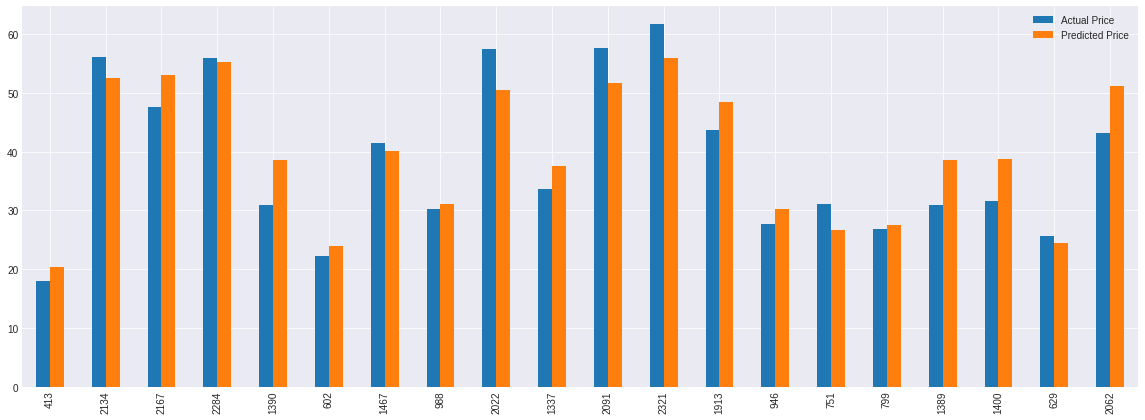

In [20]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

2.PREDICTION USING KNN

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = KNeighborsRegressor()
model.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [22]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1047     26.642046        26.385912
2331     67.842155        64.926115
887      25.251844        25.098749
2286     56.981049        56.950610
938      24.706947        25.000239
...            ...              ...
1921     44.845100        44.360027
2106     58.370041        58.153787
2301     60.030270        61.358089
603      22.307554        22.408502
715      28.304293        28.342846

[472 rows x 2 columns]


2.1 Calculating the Accuracy

In [23]:
from sklearn import metrics
import math
rmse_knn=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_knn=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_knn)
print("Accurcy Score= ",accuracy_knn*100)

Root mean square error=  0.7566734337334788
Accurcy Score=  99.68165675578045


2.2 Graphical Representation

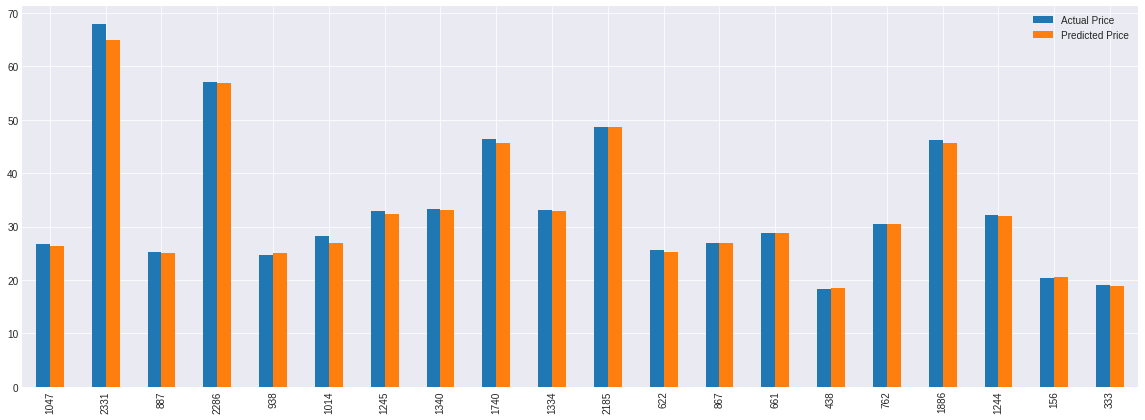

In [24]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

3.PREDICTION USING DECISION TREE REGRESSOR

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
train, test = train_test_split(df, test_size=0.20)
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model =DecisionTreeRegressor ()
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
2150     59.129871        59.568230
2231     44.405308        45.788342
599      21.637337        21.753180
836      28.220203        27.485571
856      28.841028        29.308805
...            ...              ...
212      16.981037        17.066999
164      19.213377        19.267523
2238     45.501858        44.839973
511      21.672930        21.542904
1057     27.861763        27.609112

[472 rows x 2 columns]


3.1 Calculating the Accuracy

In [27]:
from sklearn import metrics
import math
rmse_dt=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_dt=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_dt)
print("Accurcy Score= ",accuracy_dt*100)

Root mean square error=  0.857974474605539
Accurcy Score=  99.58412969250043


3.2 Graphical Representation

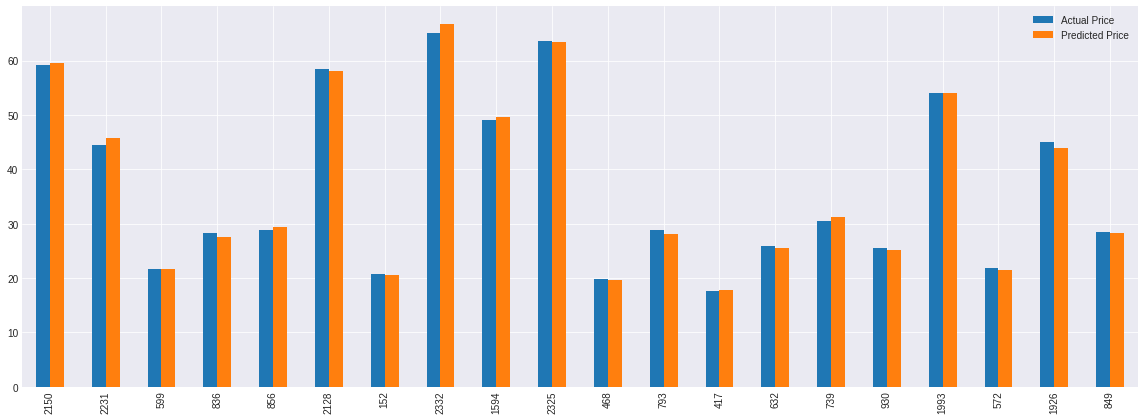

In [28]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

4.PREDICTION USING LASSO

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import Lasso
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = Lasso()
# Fit linear model using the train data set
model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
1415     32.073727        38.977320
2148     58.447975        52.676157
1770     45.263954        45.611818
870      27.276070        28.791963
1888     45.534645        47.817088
...            ...              ...
1567     47.278614        41.818006
397      18.513184        19.952195
1479     41.877811        40.173398
236      16.137064        16.943310
626      25.633829        24.231913

[472 rows x 2 columns]


4.1 Calculating the Accuracy

In [31]:
from sklearn import metrics
import math
rmse_lasso=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_lasso=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_lasso)
print("Accurcy Score= ",accuracy_lasso*100)

Root mean square error=  4.618082743473548
Accurcy Score=  88.1601442254079


4.2 Graphical Representation

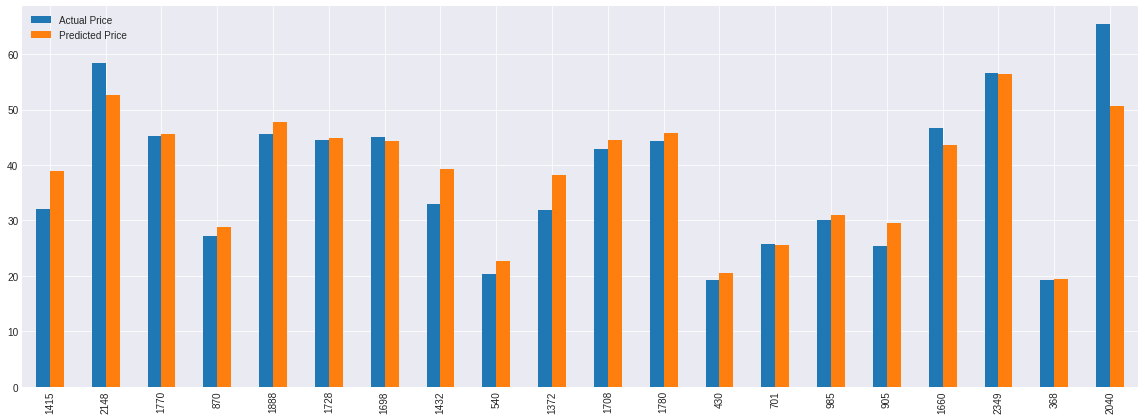

In [32]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

5. PREDICTION USING ELASTIC NET

In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import ElasticNet
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Adj Close']
model = ElasticNet()
# Fit linear model using the train data set
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Adj Close']
y_pred = model.predict(X_test)
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred})
print(dfr)

      Actual Price  Predicted Price
609      23.308752        24.023077
1819     50.264000        46.596875
371      19.143057        19.582941
1924     43.896049        48.555759
1940     49.436977        48.854255
...            ...              ...
485      20.169552        21.709729
1442     34.171246        39.563551
1420     31.654222        39.153119
2309     62.286369        55.738331
1484     41.052181        40.347105

[472 rows x 2 columns]


5.1 Calculating the Accuracy

In [35]:
from sklearn import metrics
import math
rmse_el=math.sqrt(metrics.mean_squared_error(y_test,y_pred))
accuracy_el=model.score(X_test,y_test) #Accuracy Score

print("Root mean square error= ",rmse_el)
print("Accurcy Score= ",accuracy_el*100)

Root mean square error=  4.542805115032778
Accurcy Score=  88.94523735677427


5.2 Graphical Representation

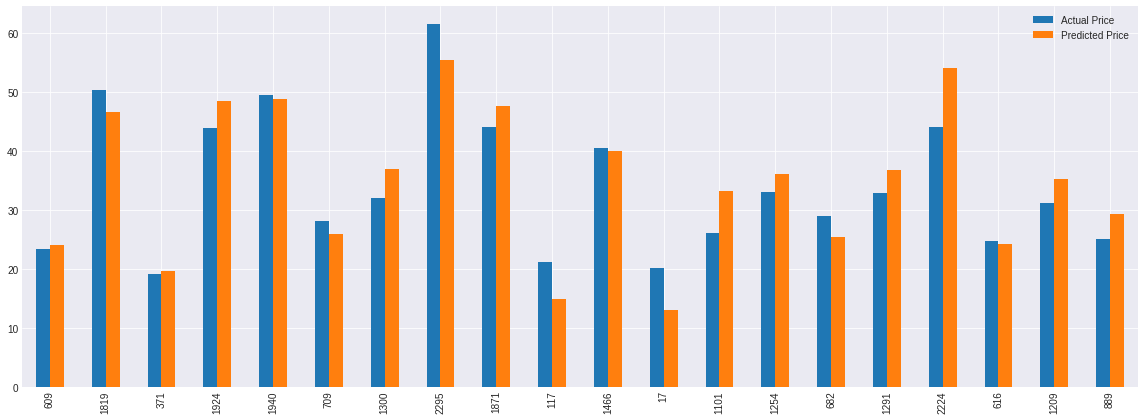

In [36]:
graph=dfr.head(20)
graph.plot(kind='bar',figsize=(20,7))

6. PREDICTION USING LSTM STACKED ESTIMATOR

In [37]:
df1=data.reset_index()['Adj Close']

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [39]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size:],df1[training_size:len(df1),:1]

In [40]:
import numpy

def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [41]:
 time_step=100
 X_train,y_train=create_dataset(train_data,time_step)
 X_test,ytest=create_dataset(train_data,time_step)

In [42]:
print(X_train)

[[0.06457597 0.0727423  0.076897   ... 0.0916279  0.08304574 0.08610046]
 [0.0727423  0.076897   0.07474799 ... 0.08304574 0.08610046 0.08740962]
 [0.076897   0.07474799 0.07789994 ... 0.08610046 0.08740962 0.09250068]
 ...
 [0.33165909 0.32785294 0.32179777 ... 0.50134993 0.5845363  0.58279594]
 [0.32785294 0.32179777 0.33183211 ... 0.5845363  0.58279594 0.56208659]
 [0.32179777 0.33183211 0.33736819 ... 0.58279594 0.56208659 0.5507746 ]]


In [43]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 10s 247ms/step - loss: 0.0232 - val_loss: 0.0030
Epoch 2/100
23/23 [==============================] - 4s 191ms/step - loss: 0.0018 - val_loss: 8.4862e-04
Epoch 3/100
23/23 [==============================] - 4s 190ms/step - loss: 6.5063e-04 - val_loss: 4.9667e-04
Epoch 4/100
23/23 [==============================] - 4s 189ms/step - loss: 4.9214e-04 - val_loss: 4.8422e-04
Epoch 5/100
23/23 [==============================] - 4s 191ms/step - loss: 4.9796e-04 - val_loss: 4.7001e-04
Epoch 6/100
23/23 [==============================] - 4s 190ms/step - loss: 4.7687e-04 - val_loss: 5.8965e-04
Epoch 7/100
23/23 [==============================] - 4s 191ms/step - loss: 5.2512e-04 - val_loss: 4.8777e-04
Epoch 8/100
23/23 [==============================] - 4s 190ms/step - loss: 4.6013e-04 - val_loss: 5.0416e-04
Epoch 9/100
23/23 [==============================] - 4s 192ms/step - loss: 4.8398e-04 - val_loss: 4.1459e-04
Epoch 10/100
23/23 [==========

In [48]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [49]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

6.1 Calculating the Accuracy

In [50]:
import math
from sklearn.metrics import mean_squared_error
rmse_lstm=math.sqrt(mean_squared_error(ytest,test_predict))
print("RMSE score of LSTM =",rmse_lstm)


RMSE score of LSTM = 26.409240870573992


7.PREDICTION USING FBPROPHET

In [51]:
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
from fbprophet import Prophet

In [52]:
model=Prophet()

In [53]:
dfb=data.reset_index()

In [54]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,18.532988
1,2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,18.963461
2,2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.182468
3,2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.069187
4,2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.235336
...,...,...,...,...,...,...,...
2352,2021-05-10,57.230000,55.880001,57.150002,55.970001,35046500.0,55.970001
2353,2021-05-11,55.630001,54.299999,55.049999,55.040001,35968100.0,55.040001
2354,2021-05-12,54.650002,53.419998,54.389999,53.619999,30232300.0,53.619999
2355,2021-05-13,54.389999,53.459999,54.040001,54.009998,29182400.0,54.009998


In [57]:
dfb[['ds','y']]=dfb[['Date','Adj Close']]

In [58]:
dfb

,Date,High,Low,Open,Close,Volume,Adj Close,ds,y
0,2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,18.532988,2012-01-03,18.532988
1,2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,18.963461,2012-01-04,18.963461
2,2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.182468,2012-01-05,19.182468
3,2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.069187,2012-01-06,19.069187
4,2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.235336,2012-01-09,19.235336
...,...,...,...,...,...,...,...,...,...
2352,2021-05-10,57.230000,55.880001,57.150002,55.970001,35046500.0,55.970001,2021-05-10,55.970001
2353,2021-05-11,55.630001,54.299999,55.049999,55.040001,35968100.0,55.040001,2021-05-11,55.040001
2354,2021-05-12,54.650002,53.419998,54.389999,53.619999,30232300.0,53.619999,2021-05-12,53.619999
2355,2021-05-13,54.389999,53.459999,54.040001,54.009998,29182400.0,54.009998,2021-05-13,54.009998


In [59]:
model.fit(dfb)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
prediction=model.make_future_dataframe(periods=200)

In [61]:
pre=model.predict(prediction)
print(pre)

             ds      trend  ...  multiplicative_terms_upper       yhat
0    2012-01-03  20.090688  ...                         0.0  20.443843
1    2012-01-04  20.082865  ...                         0.0  20.427379
2    2012-01-05  20.075041  ...                         0.0  20.445466
3    2012-01-06  20.067217  ...                         0.0  20.442819
4    2012-01-09  20.043746  ...                         0.0  20.491717
...         ...        ...  ...                         ...        ...
2552 2021-11-26  59.444411  ...                         0.0  59.474080
2553 2021-11-27  59.456203  ...                         0.0  58.358232
2554 2021-11-28  59.467995  ...                         0.0  58.389384
2555 2021-11-29  59.479788  ...                         0.0  59.531141
2556 2021-11-30  59.491580  ...                         0.0  59.652439

[2557 rows x 19 columns]


7.1 Calclulating the Accuracy

In [62]:
import math
from sklearn.metrics import mean_squared_error
rmse_fb=math.sqrt(mean_squared_error(pre['trend'],pre['yhat']))
print("RMSE error of FBProphet =",rmse_fb)

RMSE error of FBProphet = 1.0731247370351156


7.2 Graphical Visualization

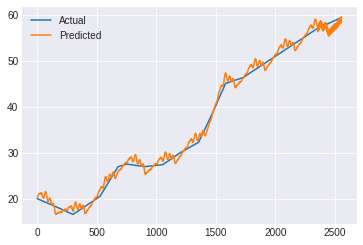

In [63]:
from matplotlib import pyplot
pyplot.plot(pre['trend'], label='Actual')
pyplot.plot(pre['yhat'], label='Predicted')
pyplot.legend()
pyplot.show()

**Evaluation of the Performance of Algorithms**

1. BASED ON THE ACCURACY SCORE

In [64]:
scores = [accuracy_linear*100,accuracy_lasso*100,accuracy_knn*100,accuracy_el*100,accuracy_dt*100]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 88.97476501898579 %
The accuracy score achieved using Lasso Regression is: 88.1601442254079 %
The accuracy score achieved using KNN is: 99.68165675578045 %
The accuracy score achieved using ElasticNet is: 88.94523735677427 %
The accuracy score achieved using Decision Tree Regressor is: 99.58412969250043 %


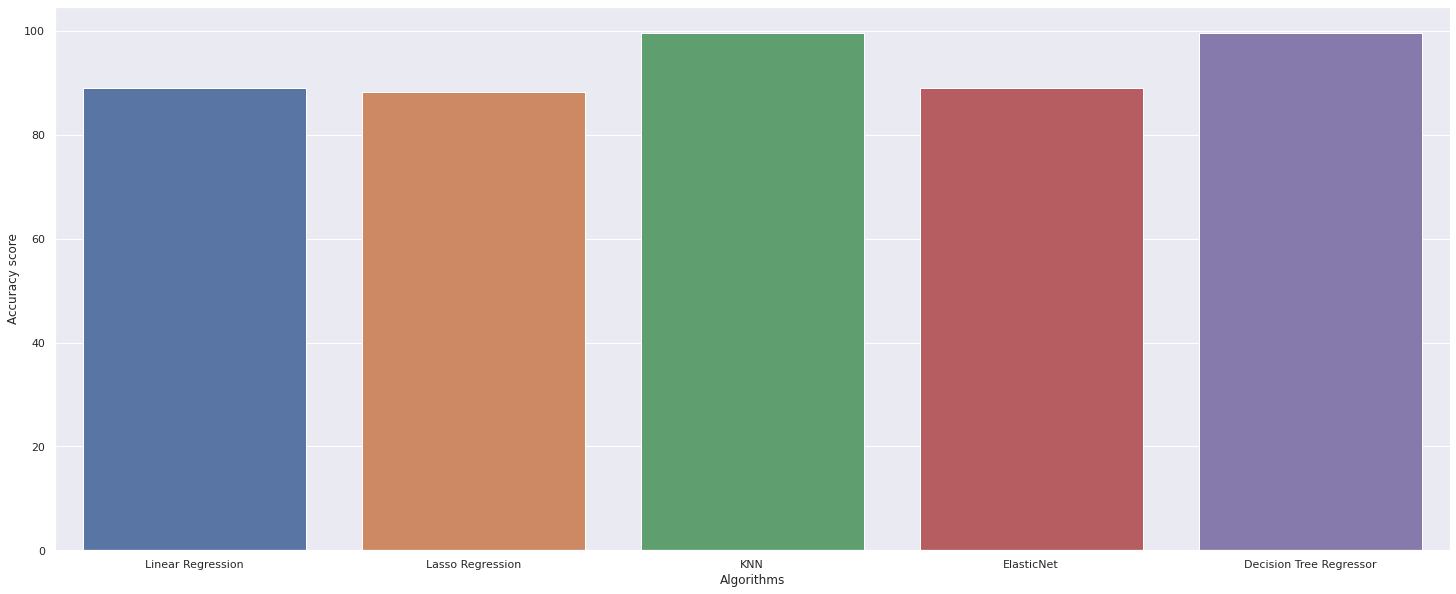

In [65]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

2. BASED ON RMSE VALUES

In [96]:
scores = [rmse_linear,rmse_lasso,rmse_knn,rmse_el,rmse_dt,rmse_lstm,rmse_fb]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor","LSTM","FB PROPHET"]
for i in range(len(algorithms)):
    print("The RMSE score achieved using "+algorithms[i]+" is: "+str(scores[i])+" ")

The RMSE score achieved using Linear Regression is: 4.341334993116015 
The RMSE score achieved using Lasso Regression is: 4.618082743473548 
The RMSE score achieved using KNN is: 0.7566734337334788 
The RMSE score achieved using ElasticNet is: 4.542805115032778 
The RMSE score achieved using Decision Tree Regressor is: 0.857974474605539 
The RMSE score achieved using LSTM is: 26.409240870573992 
The RMSE score achieved using FB PROPHET is: 1.0731247370351156 


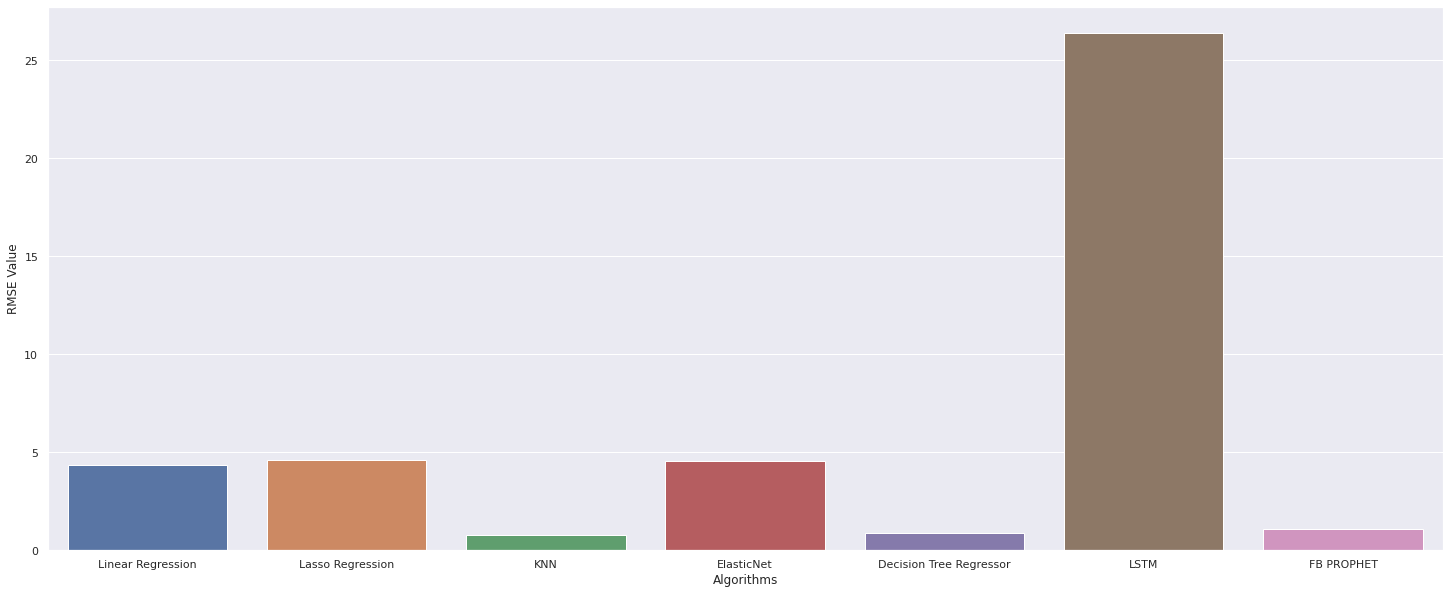

In [97]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("RMSE Value")

sns.barplot(algorithms,scores)

**FORECASTING THE FUTURE STOCK PRICES USING ML AND DEEP LEARNING**

In [68]:
df=web.DataReader('INTC',data_source='yahoo',start='2012-01-01',end='2021-05-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,24.889999,24.389999,24.620001,24.540001,44845600.0,18.532988
2012-01-04,25.129999,24.530001,24.570000,25.110001,47504000.0,18.963461
2012-01-05,25.450001,24.980000,25.059999,25.400000,49490600.0,19.182468
2012-01-06,25.400000,25.010000,25.209999,25.250000,36343500.0,19.069187
2012-01-09,25.559999,25.219999,25.400000,25.469999,47478600.0,19.235336
...,...,...,...,...,...,...
2021-05-10,57.230000,55.880001,57.150002,55.970001,35046500.0,55.970001
2021-05-11,55.630001,54.299999,55.049999,55.040001,35968100.0,55.040001
2021-05-12,54.650002,53.419998,54.389999,53.619999,30232300.0,53.619999


1.FORECASTING USING LINEAR REGRESSION

In [69]:
from sklearn import preprocessing
forecast = 30
df['Prediction'] = df[['Adj Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression()
clf.fit(X_train, y_train)

confidence_linear = clf.score(X_test, y_test)

forecast_predicted_linear = clf.predict(X_forecast)
print(forecast_predicted_linear)

[67.04832812 65.45528931 65.9486716  65.95142977 68.13315396 67.13280963
 64.52354876 64.23734362 65.25260831 64.31472608 63.78860712 62.98790493
 63.91838604 63.35863411 60.50960736 59.66824419 58.64831105 58.85555547
 58.89824779 59.25956944 58.20808318 57.6383684  57.96379289 59.07123236
 59.31987204 58.40671598 57.64904614 56.50524873 56.41405878 57.69658084]


In [71]:
print(confidence_linear*100)

93.88529907156517


(737450.0, 738125.4)

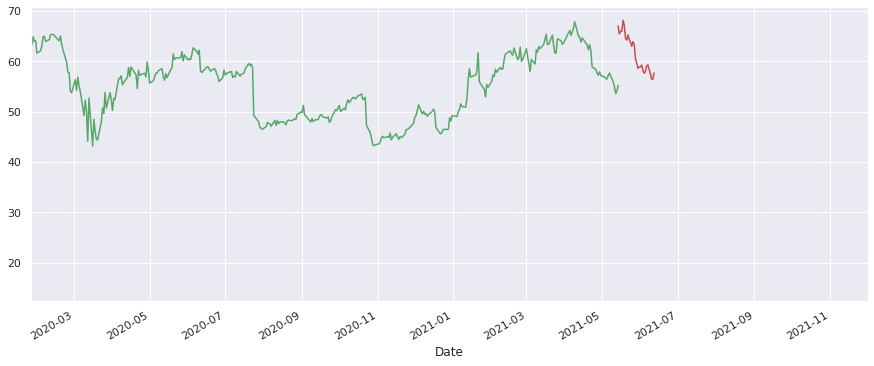

In [77]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_linear,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

2. FORECASTING USING LASSO REGRESSION

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = Lasso()
clf.fit(X_train, y_train)

confidence_lasso = clf.score(X_test, y_test)

forecast_predicted_lasso= clf.predict(X_forecast)
print(forecast_predicted_lasso)

[63.58905439 62.70855684 63.32850188 64.04727314 65.13440985 62.57379757
 62.40308457 61.4776707  62.22339175 61.98080576 60.9745322  60.1389613
 61.03742193 60.02216166 57.03028386 56.59902179 55.88923724 55.57477481
 56.16775973 55.49391167 55.25132912 54.92788344 54.88296023 55.50490883
 55.93882622 54.40203676 53.56132074 52.27764545 52.63020311 53.73018537]


In [79]:
print(confidence_lasso*100)

92.24971419304799


(737450.0, 738125.4)

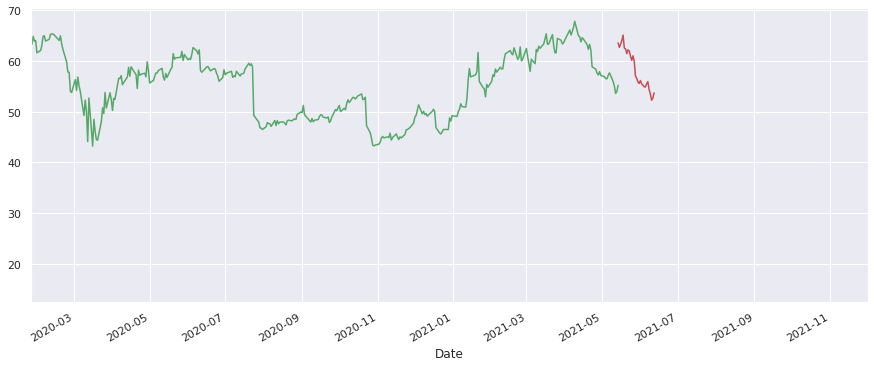

In [81]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_lasso,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

3. FORECASTING USING ELASTIC NET

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = ElasticNet()
clf.fit(X_train, y_train)

confidence_elastic = clf.score(X_test, y_test)

forecast_predicted_elastic= clf.predict(X_forecast)
print(forecast_predicted_elastic)

[60.80046821 60.71956665 60.91333825 61.75471874 62.41924421 61.29235841
 60.14385548 59.59885912 59.60340567 59.96651774 59.0264965  58.19538877
 58.3925694  58.09897167 54.61122617 54.43903825 53.76400578 53.2494171
 53.64034258 53.26717386 53.07118094 52.4107447  52.58357243 52.664586
 53.35486774 52.24005878 50.93973343 49.95925996 49.99964942 50.86261847]


In [83]:
print(confidence_elastic*100)

89.52577200798471


(737450.0, 738125.4)

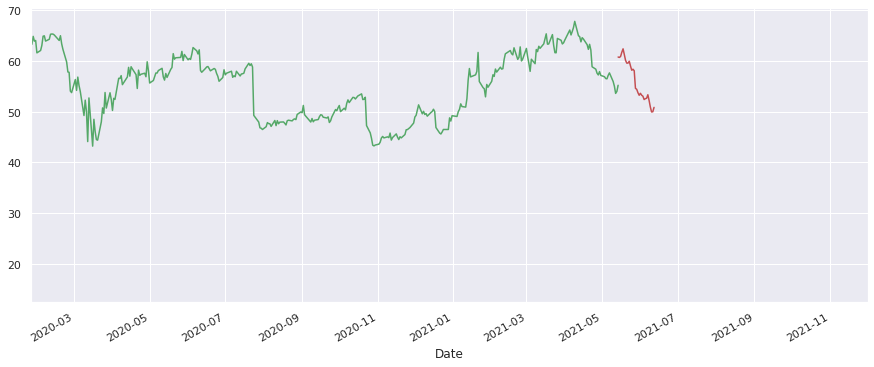

In [84]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_elastic,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

4.FORECASTING USING KNN

In [85]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = KNeighborsRegressor()
clf.fit(X_train, y_train)

confidence_knn = clf.score(X_test, y_test)

forecast_predicted_knn= clf.predict(X_forecast)
print(forecast_predicted_knn)

[54.51197815 54.93954468 46.46086578 47.4663353  51.10214996 54.68106842
 54.45306473 54.45306473 53.23863983 50.93920364 54.89356079 57.52059021
 59.77429123 59.98183212 60.36465454 55.85393524 55.35408478 57.16692657
 57.66262131 57.16692657 59.33573227 58.7073204  60.03043137 63.30400467
 58.05229568 58.7073204  56.28839874 54.28337936 53.47303009 42.23809814]


In [86]:
print(confidence_knn*100)

94.15253427528


(737450.0, 738125.4)

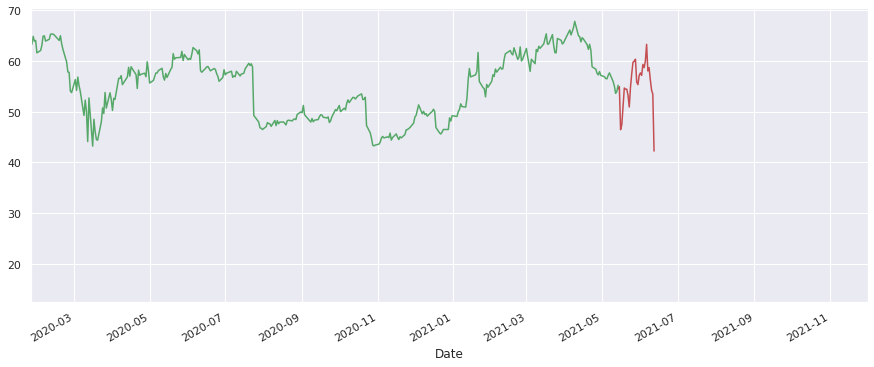

In [87]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

5.FORECASTING USING DECISION TREE

In [88]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

confidence_dt = clf.score(X_test, y_test)

forecast_predicted_dt = clf.predict(X_forecast)
print(forecast_predicted_dt)

[56.55169296 52.28832626 50.75785065 48.02621841 52.28832626 56.55169296
 56.55169296 55.04000092 55.22679901 55.22679901 55.04000092 62.18698502
 56.90948868 62.18698502 62.49508667 47.96630859 48.27245712 58.88491058
 60.72744751 58.46839142 61.62303925 63.39951706 55.23228455 57.50712585
 56.81310654 63.39951706 61.86894226 42.59231949 43.83018875 55.0105896 ]


In [89]:
print(confidence_dt*100)

93.88593616609826


(737450.0, 738125.4)

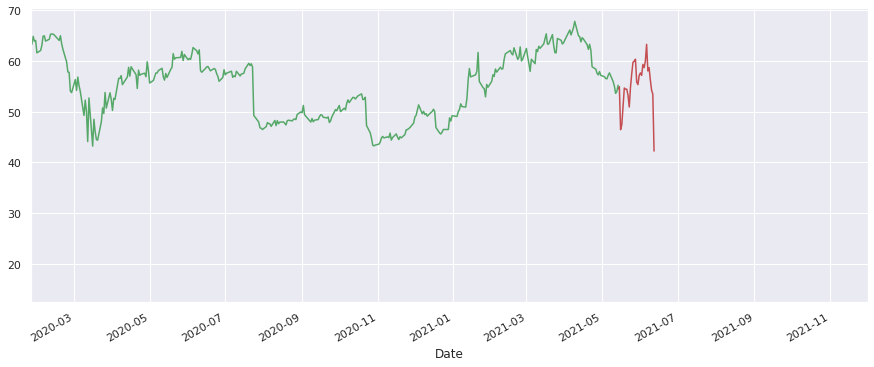

In [90]:
dates = pd.date_range(start="2021-05-14", end="2021-06-12")
plt.plot(dates, forecast_predicted_knn,color='r')
df['Adj Close'].plot(figsize=(15,6),color='g')
plt.xlim(xmin=datetime.date(2020,1,26))

In [91]:
compare=pd.DataFrame({'Linear Regression':forecast_predicted_linear,'Lasso':forecast_predicted_lasso,'Decision tree Regressor':forecast_predicted_dt,'Elastic Net':forecast_predicted_elastic,'K Neighbhors Regressor':forecast_predicted_knn})

In [92]:
compare.head(20)

,Linear Regression,Lasso,Decision tree Regressor,Elastic Net,K Neighbhors Regressor
0,67.048328,63.589054,56.551693,60.800468,54.511978
1,65.455289,62.708557,52.288326,60.719567,54.939545
2,65.948672,63.328502,50.757851,60.913338,46.460866
3,65.951430,64.047273,48.026218,61.754719,47.466335
4,68.133154,65.134410,52.288326,62.419244,51.102150
5,67.132810,62.573798,56.551693,61.292358,54.681068
6,64.523549,62.403085,56.551693,60.143855,54.453065
7,64.237344,61.477671,55.040001,59.598859,54.453065
8,65.252608,62.223392,55.226799,59.603406,53.238640
9,64.314726,61.980806,55.226799,59.966518,50.939204


**EVALUATION OF PERFORMANCE IN FORECASTING**

In [93]:
scores = [confidence_linear,confidence_lasso,confidence_knn,confidence_elastic,confidence_dt]
algorithms = ["Linear Regression","Lasso Regression","KNN","ElasticNet","Decision Tree Regressor"]
for i in range(len(algorithms)):
    print("The confidence scores achieved using "+algorithms[i]+" is: "+str(scores[i]*100)+"%")

The confidence scores achieved using Linear Regression is: 93.88529907156517%
The confidence scores achieved using Lasso Regression is: 92.24971419304799%
The confidence scores achieved using KNN is: 94.15253427528%
The confidence scores achieved using ElasticNet is: 89.52577200798471%
The confidence scores achieved using Decision Tree Regressor is: 93.88593616609826%


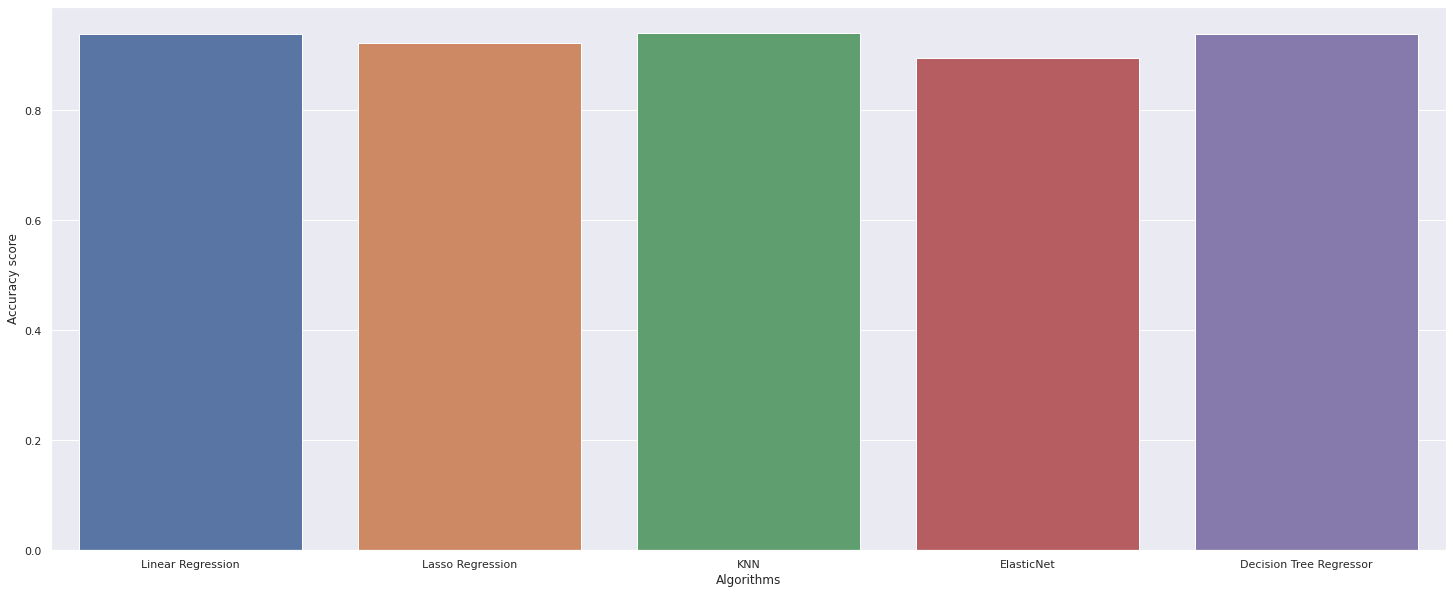

In [94]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)